In [1]:
# import some packages for nice visualization
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import concurrent.futures

In [2]:
from scores_from_ranking import ScoresFromRanking
from test_routines import compute_correlations

In [11]:
# visualize the mean and variance of the ranking correlations with respect to `n_rankings` given `n_items`
n_items = 40
n_random_trials = 15
step_size = 10
max_n_rankings = 100

results = []

with concurrent.futures.ProcessPoolExecutor(4) as executor:
    futures = [executor.submit(compute_correlations, n_rankings, n_items, n_random_trials) 
               for n_rankings in range(2, max_n_rankings, step_size)]
    for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
        results.append(future.result())

results = np.array(results)

100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


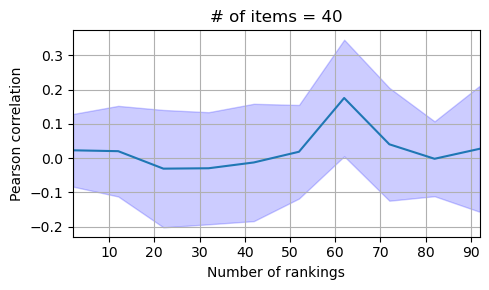

In [12]:
# plot the results beautifully
plt.figure(figsize=(5, 3))

plt.plot(results[:, 0], results[:, 1])
plt.fill_between(results[:, 0], results[:, 1] - results[:, 2], results[:, 1] + results[:, 2], 
                 alpha=0.2, color='b')

plt.title(f'# of items = {n_items}')

plt.xlabel('Number of rankings')
plt.ylabel('Pearson correlation')

plt.xlim(np.min(results[:, 0]), np.max(results[:, 0]))

plt.grid(True)
plt.tight_layout()

plt.show()